In [143]:
# Kütüphanelerin Yüklenmesi / Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [145]:
#Veri Setlerinin Yüklenmesi / Load solar generation and weather sensor data
# - Plant_1_Generation_Data.csv: Üretim verileri (DC, AC güç, günlük/yıllık verim)
# - Plant_1_Weather_Sensor_Data.csv: Hava durumu verileri (sıcaklık, radyasyon vb.)
gen_df = pd.read_csv("Plant_1_Generation_Data.csv")
weather_df = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

In [146]:
# İlk İnceleme ve Tarih/Saat Dönüşümü / Convert DATE_TIME columns to datetime format
# Tarih ve saat bilgilerini datetime tipine dönüştürerek analizlerde kolaylık sağlıyoruz
gen_df["DATE_TIME"] = pd.to_datetime(gen_df["DATE_TIME"])
weather_df["DATE_TIME"] = pd.to_datetime(weather_df["DATE_TIME"])

C:\Users\aziz-\AppData\Local\Temp\ipykernel_16900\3139235801.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_df["DATE_TIME"] = pd.to_datetime(gen_df["DATE_TIME"])


In [149]:
# İlk 5 satırın görüntülenmesi
print("\n--- Generation Data ---")
print(gen_df.head())
print("\n--- Weather Data ---")
print(weather_df.head())


--- Generation Data ---
   DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0  

--- Weather Data ---
            DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   41350

In [151]:
# Veri Setlerini Birleştirme / Merge generation and weather datasets on PLANT_ID and DATE_TIME
merged_df = pd.merge(gen_df, weather_df, on=["DATE_TIME", "PLANT_ID"])


In [153]:
# Drop unnecessary columns / Gereksiz kaynak anahtarlarını siliyoruz
merged_df.drop(["SOURCE_KEY_x", "SOURCE_KEY_y"], axis=1, inplace=True)


In [155]:
# Eksik veri kontrolü / Check for missing values
print("\nEksik veriler:\n")
print(merged_df.isnull().sum())


Eksik veriler:

DATE_TIME              0
PLANT_ID               0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [157]:
# Özellik Seçimi ve Veri Ayrımı / Feature selection and data split
features = ["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION", "DAILY_YIELD", "TOTAL_YIELD"]
target = "AC_POWER"

In [159]:
X = merged_df[features]
y = merged_df[target]

In [161]:
# Eğitim ve test ayrımı (80% eğitim, 20% test) / Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# Model Oluşturma ve Eğitim / Train a Random Forest Regressor
# Rastgele Orman regresyon modeli, doğrusal olmayan ilişkilerde oldukça başarılıdır.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [164]:
# Model Performansını Ölçme / Evaluate model performance using MAE, RMSE and R2
# MAE: Ortalama mutlak hata / RMSE: Kök ortalama kare hata / R2: Açıklanan varyans oranı
y_pred = model.predict(X_test)


In [165]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [166]:
#Model Performansı / Model Performance 
print("\nModel Performansı:")
print(f"MAE (Ortalama Mutlak Hata): {mae:.2f}")
print(f"RMSE (Kök Ortalama Kare Hata): {rmse:.2f}")
print(f"R2 Skoru: {r2:.4f}")


Model Performansı:
MAE (Ortalama Mutlak Hata): 14.36
RMSE (Kök Ortalama Kare Hata): 37.52
R2 Skoru: 0.9909


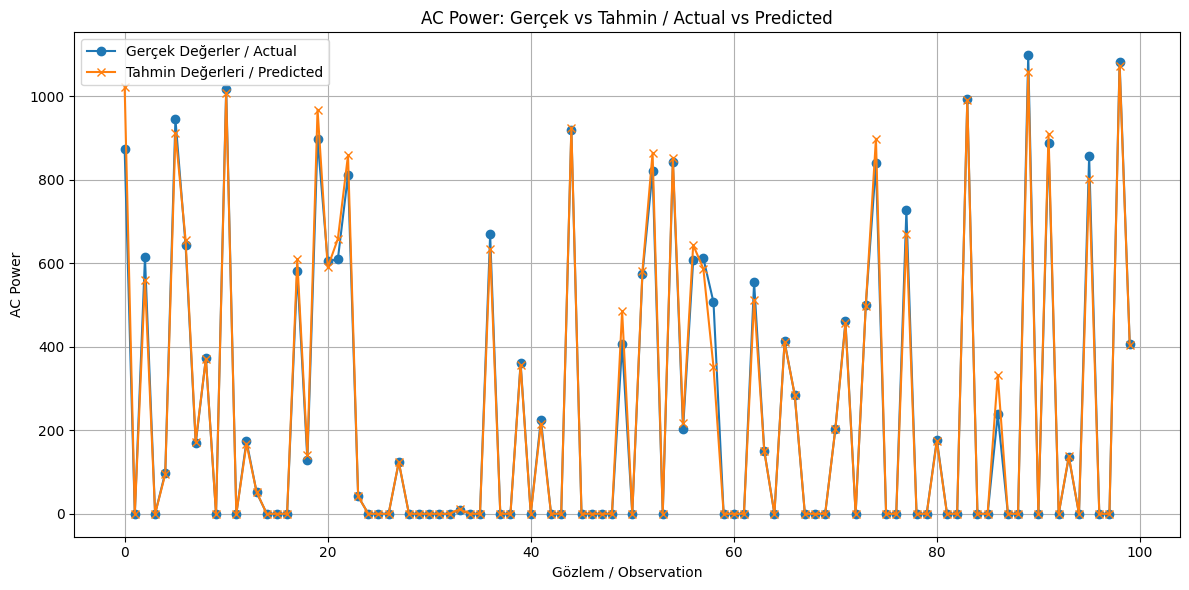

In [167]:
# Modelin doğruluk görselleştirmesi / Visual comparison of true vs predicted values (first 100 observations)
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Gerçek Değerler / Actual', marker='o')
plt.plot(y_pred[:100], label='Tahmin Değerleri / Predicted', marker='x')
plt.title("AC Power: Gerçek vs Tahmin / Actual vs Predicted")
plt.xlabel("Gözlem / Observation")
plt.ylabel("AC Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [168]:
# Özellik önemi grafiği / Feature importance barplot
importances = model.feature_importances_
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df.sort_values(by="Importance", ascending=True, inplace=True)

C:\Users\aziz-\AppData\Local\Temp\ipykernel_16900\3632427303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")


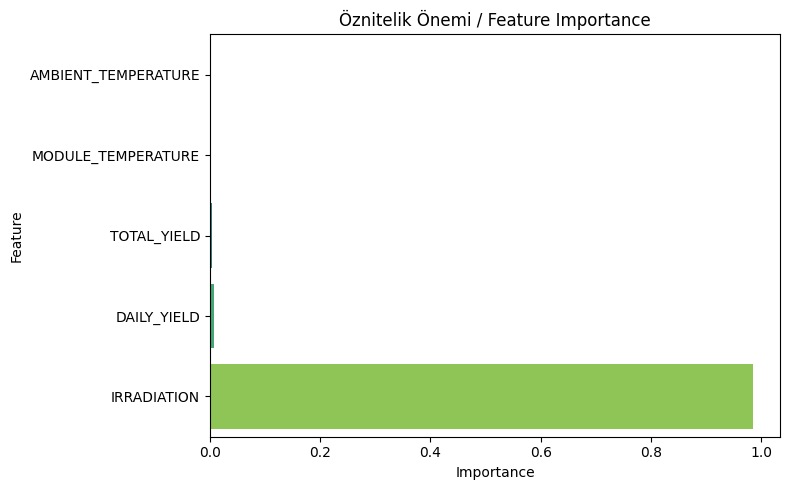

In [169]:
plt.figure(figsize=(8,5))
sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis")
plt.title("Öznitelik Önemi / Feature Importance")
plt.tight_layout()
plt.show()

In [170]:
# Modeli Test Et (Manuel Örneklerle) / Test the model on manual examples
# Rastgele test verilerinden örnek alıp modelin tahmin gücünü gözlemliyoruz.
sample = X_test.sample(3, random_state=1)
pred_sample = model.predict(sample)

print("\nModelin örnek tahminleri:")
for i, idx in enumerate(sample.index):
    print(f"\n🔍 Örnek {i+1}")
    print(f"Girdi (Input Features):\n{sample.loc[idx].to_dict()}")
    print(f"Tahmin Edilen AC Power: {pred_sample[i]:.2f} kW")
    print(f"Gerçek AC Power: {y_test.loc[idx]:.2f} kW")




Modelin örnek tahminleri:

🔍 Örnek 1
Girdi (Input Features):
{'AMBIENT_TEMPERATURE': 23.12093293333333, 'MODULE_TEMPERATURE': 20.880371199999995, 'IRRADIATION': 0.0, 'DAILY_YIELD': 7836.0, 'TOTAL_YIELD': 7263053.0}
Tahmin Edilen AC Power: 0.00 kW
Gerçek AC Power: 0.00 kW

🔍 Örnek 2
Girdi (Input Features):
{'AMBIENT_TEMPERATURE': 28.1994974, 'MODULE_TEMPERATURE': 48.014198666666665, 'IRRADIATION': 0.813000858, 'DAILY_YIELD': 2131.0, 'TOTAL_YIELD': 7016049.0}
Tahmin Edilen AC Power: 1050.75 kW
Gerçek AC Power: 976.24 kW

🔍 Örnek 3
Girdi (Input Features):
{'AMBIENT_TEMPERATURE': 24.034554, 'MODULE_TEMPERATURE': 24.97640393333333, 'IRRADIATION': 0.1720124636666667, 'DAILY_YIELD': 51.0, 'TOTAL_YIELD': 7123578.0}
Tahmin Edilen AC Power: 242.43 kW
Gerçek AC Power: 240.07 kW
